# Worksheet 02

Name:  Jiang Cheng Liu
UID: U77948366

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

As you write the code, it may not be runnable, for example, in Python. So you can only see the results after you finish your functions. 

b) What is a drawback of the bottom up approach?

Requires more planning. So the code is more inflexible and might induce more cost later on to change it. 

c) What are 3 things you can do to have a better debugging experience?


Dont Panic, Read the error, Re-Read code - take your time, Sanity check where you can. 

d) (Optional) Follow along with the live coding. You can write your code here:

In [2]:
#The 8-Queen Problem
#dfs search

#create a interface for board/board itself
class Board:

    def __init__(self, n):
        self.board = [["-" for _ in range(8)] for _ in range(8)]

    def __repr__(self):
        res = ""
        for row in range(len(self.board)):
            for col in range(len(self.board[0])):
                res += self.board[row][col] + " "
            res += "\n"
        return res
    
    def set_queen(self, row, col):
        self.board[row][col] = "Q"
    
    def unset_queen(self, row, col):
        self.board[row][col] = "-"
    
    def find_solution(self):

        row = 0
        col = 0

        while row < 8:
            #searching for solution
            if self.is_valid_move(row, col):
                self.set_queen(row, col)
                row += 1
                col = 0
            else:  
                col += 1
                if col >= 8:
                    #no solution on this row, then backtrack on queen of previous row
                    self.get_queen_on_row(row-1)
                    col += 1
                    

        
        #we have found the solution 

test = Board(8)
print(test)

- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 



## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [3]:
import pandas as pd

df = pd.read_csv("train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [4]:

print("there are " +  str(len(df.dropna(how="any"))) + " rows with at least one empty value")

there are 183 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [5]:
df = df.dropna(axis=1, thresh=df.shape[0] - 200)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [6]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [9]:
components = df['Name'].str.split(expand=True)
df['First Name'] = components[2]
df['Middle Name'] = components[3] 
df['Last Name'] = components[0]
df['Title'] = components[1]
df['Last Name'] = df['Last Name'].str.replace(',', '')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr.


f) Complete the code below to replace all missing ages with the average age

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,First Name,Middle Name,Last Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Mr.,Owen,Harris,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Mrs.,John,Bradley,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,Laina,None,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Mrs.,Jacques,Heath,Futrelle
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Mr.,William,Henry,Allen


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

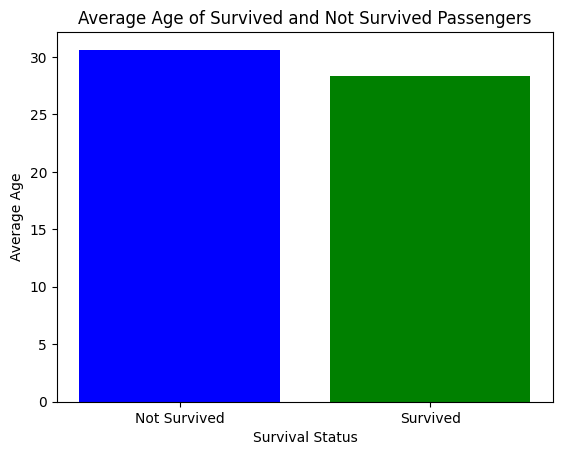

'\nOn average those passengers who survived were younger than those who did not survive.\n'

In [10]:
import matplotlib.pyplot as plt

survival = df.groupby('Survived')['Age'].mean()

plt.bar(survival.index, survival, color=['blue', 'green'])
plt.title('Average Age of Survived and Not Survived Passengers')
plt.xlabel('Survival Status')
plt.ylabel('Average Age')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

"""
On average those passengers who survived were younger than those who did not survive.
"""
